In [170]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm

###########################################
# Picard : Preconditioned ICA for Real Data
###########################################
from picard import picard
from sklearn.decomposition import FastICA, PCA

In [171]:
###############################################################################
# Generate sample data
def generate_data(n_samples):
    np.random.seed(0)
    n_samples = n_samples
    time = np.linspace(0, 8, n_samples)
    
    s1 = np.sin(2 * time) * np.sin(40 * time)
    s2 = np.sin(3 * time) ** 5
    s3 = np.random.laplace(size=s1.shape)
    
    S = np.c_[s1, s2, s3].T

    S /= S.std(axis=1)[:, np.newaxis]  # Standardize data
    # Mix data
    A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
    X = np.dot(A, S)  # Generate observations
    
    return X

In [172]:
def picard_time(X):
    # Compute ICA via Picard
    start = tm.time()
    _, _, Y_picard = picard(X, ortho=False, random_state=0)
    return (tm.time() - start)

def picardo_time(X):
    start = tm.time()
    _, _, Y_picardo = picard(X, ortho=True, random_state=0)
    return (tm.time() - start)


In [173]:
def fastica_time(X):
    # Compute ICA via FastICA
    ica = FastICA(n_components=3)
    start = tm.time()
    S_ = ica.fit_transform(X.T).T  # Reconstruct signals
    return (tm.time() - start)


In [193]:
p_time = []
po_time = []
fic_time = []
x = []

In [194]:
for i in range(1000, 10000, 1000):
    X = generate_data(i)
    p_time.append(picard_time(X))
    po_time.append(picardo_time(X))
    fic_time.append(fastica_time(X))
    x.append(i)

In [195]:
x = np.asarray(x)

array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])

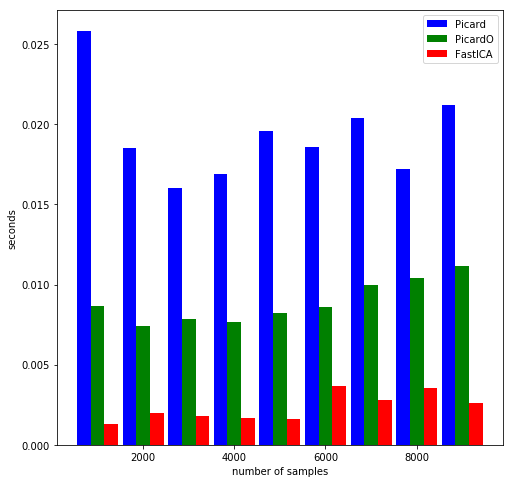

In [201]:
def comparison_plot():
    w = 300
    plt.figure(figsize=(8,8))
    plt.bar(x-w, p_time,width=w,color='b',align='center')
    plt.bar(x, po_time,width=w,color='g',align='center')
    plt.bar(x+w, fic_time,width=w,color='r',align='center')
    plt.xlabel("number of samples")
    plt.ylabel("seconds")
    plt.legend(["Picard","PicardO", "FastICA"])
    plt.show()
comparison_plot()  

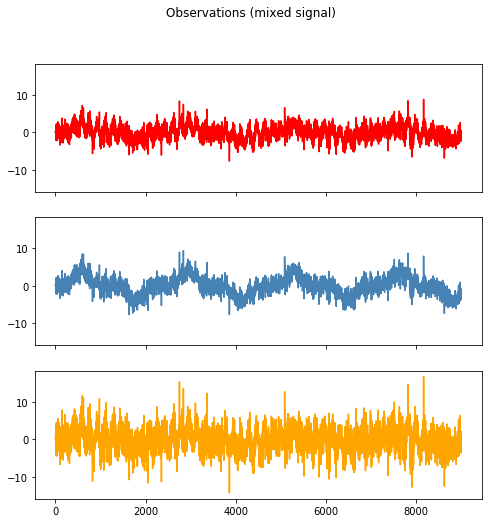

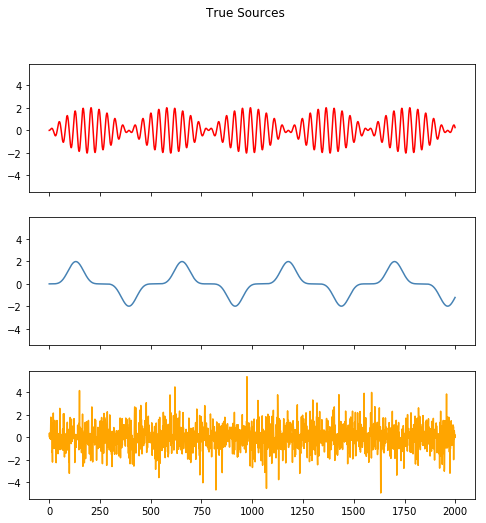

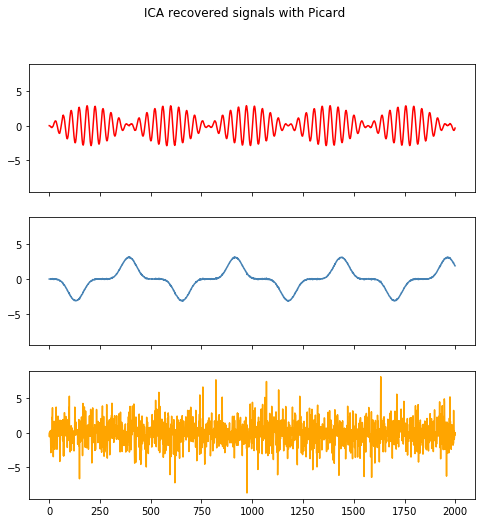

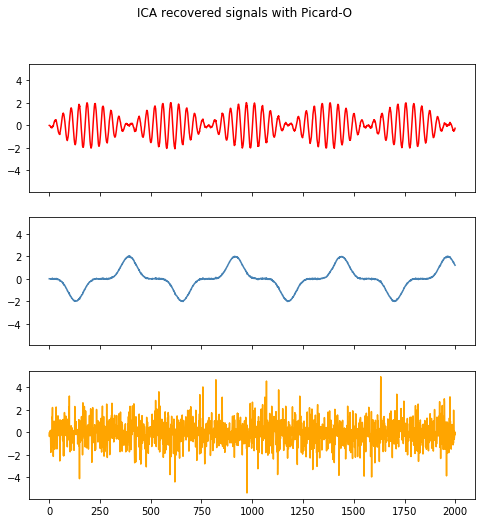

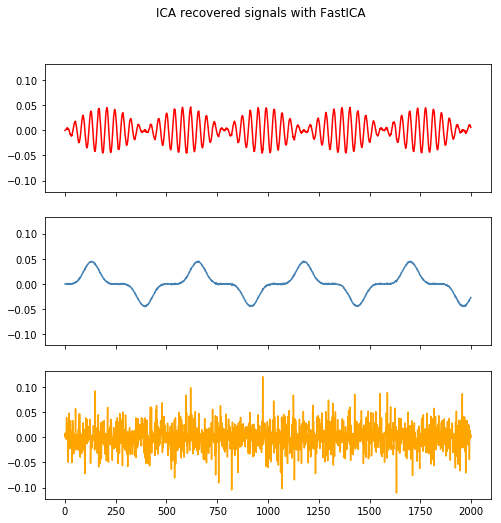

In [202]:
###############################################################################
# Plot results
models = [X, S, Y_picard, Y_picardo,S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals with Picard',
         'ICA recovered signals with Picard-O',
         'ICA recovered signals with FastICA']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    fig, axes = plt.subplots(3, 1, figsize=(8, 8),sharex=True, sharey=True)
    plt.suptitle(name)
    for ax, sig, color in zip(axes, model, colors):
           ax.plot(sig, color=color)
        
plt.show()